In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data as a CSV file
data = pd.read_csv(Path('project4data.csv'))
data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
0,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,Primary,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0
1,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,NaN,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1
2,01016FD1342018BDC00017,FD,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,12/31/1988,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3
3,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0
4,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,NaN,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1


In [3]:
#Descriptive for our continuous variables
data.describe()

,"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,0.607370,1.313922,6.654231,12.721338,0.001137,2.635123
std,0.488391,6.927789,15.650756,47.339809,0.033710,10.879867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000
75%,1.000000,1.000000,7.000000,15.000000,0.000000,3.000000
max,1.000000,396.000000,396.000000,1664.000000,1.000000,495.000000


In [4]:
#Determine # of missing rows in the variables
data.isna().sum()

CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)                             0
SUBSTR(P.PROGRAM_ID,6,2)                                                  0
DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)       0
ACCEPTANCE_DATE                                                          13
ARREST_DATE                                                              63
REFERRAL_DATE                                                           104
ACCEPTANCE_TYPE                                                          13
EXIT_DATE                                                                 0
REFERRAL_SOURCE                                                          60
DOB                                                                       0
GENDER                                                                    0
RACE                                                                      0
EMP_UNSTABLE_CHRONIC                                                      0
DIAGNOSIS_RE

In [5]:
#View the types of variables 
data.dtypes

CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)                          object
SUBSTR(P.PROGRAM_ID,6,2)                                               object
DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)     int64
ACCEPTANCE_DATE                                                        object
ARREST_DATE                                                            object
REFERRAL_DATE                                                          object
ACCEPTANCE_TYPE                                                        object
EXIT_DATE                                                              object
REFERRAL_SOURCE                                                        object
DOB                                                                    object
GENDER                                                                 object
RACE                                                                   object
EMP_UNSTABLE_CHRONIC                                            

In [6]:
#Convert Data objects to Datetime variables 
data['ACCEPTANCE_DATE'] = pd.to_datetime(data['ACCEPTANCE_DATE'])

data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])

data['REFERRAL_DATE'] = pd.to_datetime(data['REFERRAL_DATE'])
data['EXIT_DATE'] = pd.to_datetime(data['EXIT_DATE'])
data['DOB'] = pd.to_datetime(data['DOB'])

#Consider writing for loop


In [7]:

 #obtain Age from Date of Birth
# import datetime as dt

now = pd.to_datetime('now')

data['age'] = (now - data['DOB']).dt.total_seconds() / (60*60*24*365.25)
data['age'].describe()




count    4396.000000
mean       38.737026
std        11.713486
min         1.503788
25%        30.272440
50%        37.068470
75%        46.174562
max        81.068470
Name: age, dtype: float64

In [8]:
#Calculate difference in days between arrest to acceptance

data['time_arrest_accept'] = data['ACCEPTANCE_DATE'] - data['ARREST_DATE']

data['time_arrest_accept'].describe()


count                           4327
mean     243 days 19:45:44.719204992
std      416 days 16:57:28.223918820
min             -7670 days +00:00:00
25%                 58 days 00:00:00
50%                127 days 00:00:00
75%                307 days 00:00:00
max              10141 days 00:00:00
Name: time_arrest_accept, dtype: object

In [9]:
#Filter data based on reasonable age and differences between arrest dates and program acceptance
data2 = data[(data.age > 15) & (data.time_arrest_accept > '0 days')]
data2.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.436711,5 days
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.436711,5 days
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.885034,75 days
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.477094,157 days
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.477094,157 days


In [10]:
#Display duplicate data within the dataframe
data2[data2.duplicated(keep=False)]

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept


In [11]:
#Rename Variables
data2 = data2.rename(columns={"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)": 'GRADUATED',
                              "CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)": 'PARTICIPANT_ID', 
                              'SUBSTR(P.PROGRAM_ID,6,2)': 'PROGRAM_TYPE',
                              'COUNT(DISTINCTSI.SANC_INCENT_ID)': 'No_SANC_INCENT',
                              'COUNT(DISTINCTT.TREATMENT_ID)': 'No_TREATMENTS',
                              'COUNT(DISTINCTDT.DRUG_TEST_ID)': 'No_DRUG_TEST',
                              'COUNT(DISTINCTEA.EMP_ASSIST_ID)': 'No_EMP_ASSIST',
                              'COUNT(DISTINCTJS_HEARING_ID)': 'No_HEARING'})
data2.head()

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,age,time_arrest_accept
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.436711,5 days
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.436711,5 days
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.885034,75 days
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.477094,157 days
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.477094,157 days


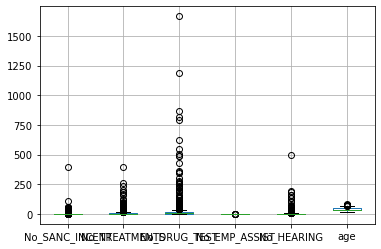

In [27]:
 import seaborn as sns

# # a = sns.boxplot("No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "age", "time_arrest_accept", data=data2)
# # plt.show()
# data2.dtypes
#Boxplot of continuous variables in the dataset. 
boxplot = data2.boxplot(column=["No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "age"])

#work to expand box to make it visable
#consider truncating if value >=... the value=... before normalizing because values will be off

#####Statistically test of outliers is another option: IsolationForest in SKLearn

#Need to recode that 'time_arrest_accept'*******************************************

In [28]:
#correlation Table
variables = data2[["No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "age"]]
variables.corr(method='spearman')
#These are spearman correlation coefficients for non-normal data.  
#Some of the Pearson correlations are high, but not appropriate for non-normal data. 

,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,age
No_SANC_INCENT,1.000000,0.332865,0.367314,0.005824,0.441184,-0.021374
No_TREATMENTS,0.332865,1.000000,0.572923,0.033954,0.498878,-0.005341
No_DRUG_TEST,0.367314,0.572923,1.000000,0.023738,0.472835,0.087002
No_EMP_ASSIST,0.005824,0.033954,0.023738,1.000000,-0.016868,0.011449
No_HEARING,0.441184,0.498878,0.472835,-0.016868,1.000000,-0.002558
age,-0.021374,-0.005341,0.087002,0.011449,-0.002558,1.000000


<AxesSubplot:>

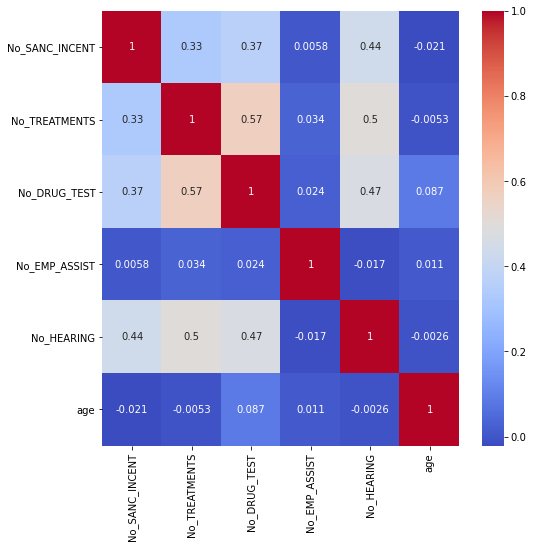

In [33]:
#Spearman correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(variables.corr(method='spearman'), annot=True, cmap="coolwarm")

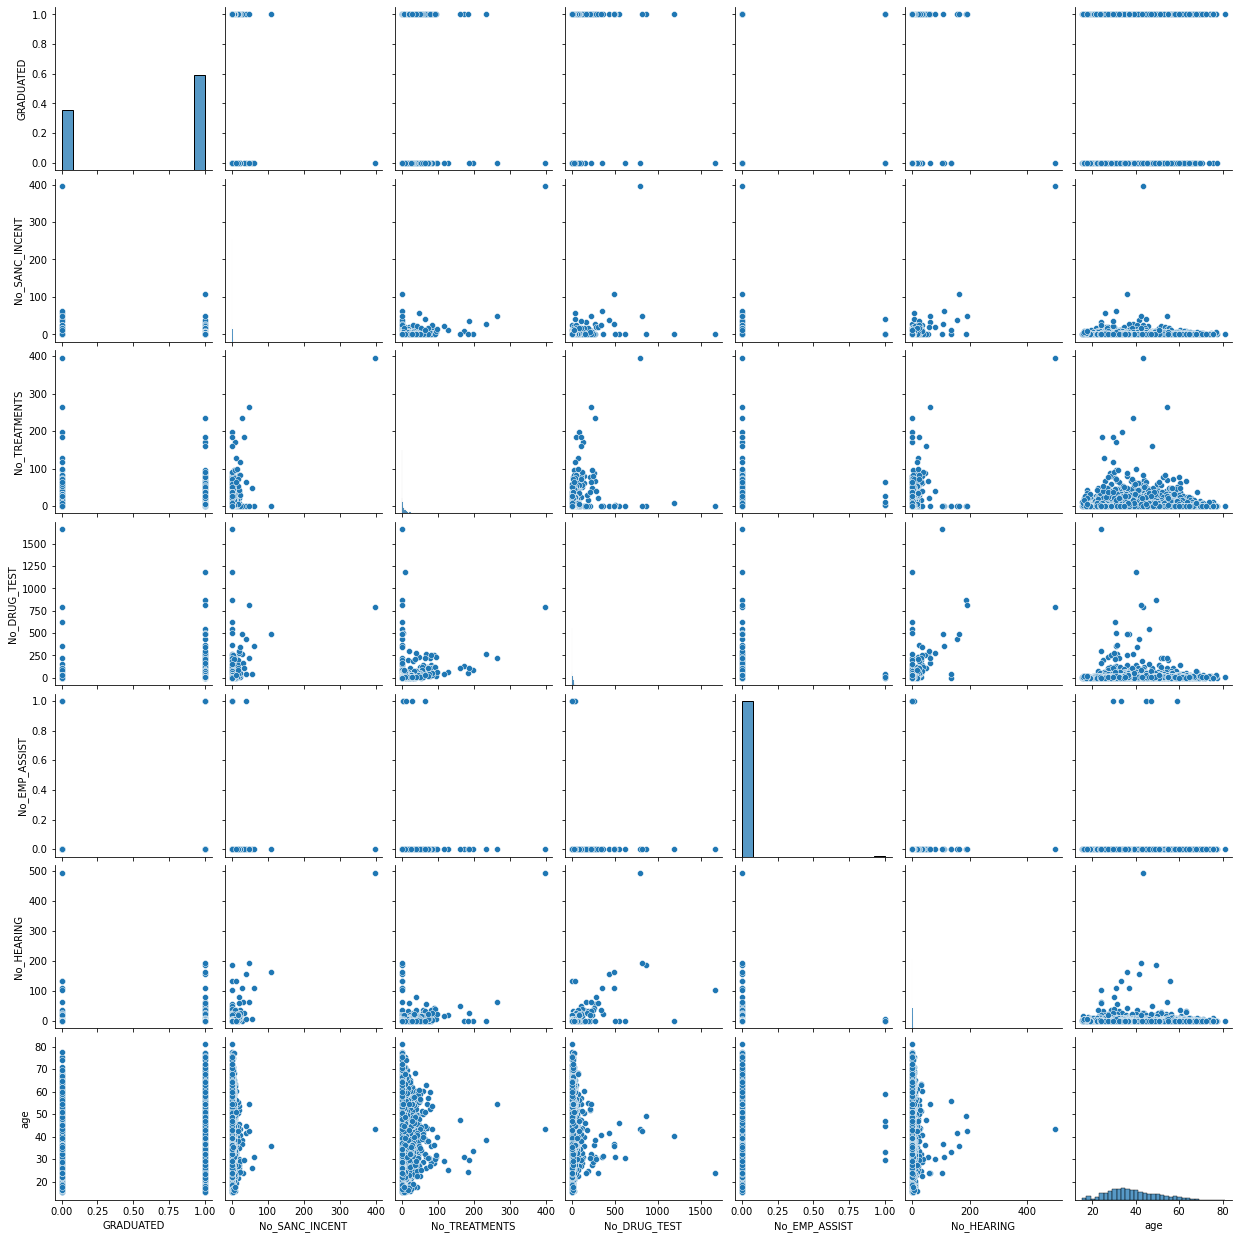

In [34]:
sns.pairplot(data2)